In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [75]:
dataset = pd.read_csv("data/cleaned_5250.csv")
missing_values_idx = dataset.isna().any(axis=1)
clean_dataset = dataset[~missing_values_idx]
clean_dataset.shape

(4765, 13)

In [76]:
num_obeservation = 4000
df = clean_dataset.iloc[range(num_obeservation)]
full_df = df.copy()
df = df.drop("name", axis=1)

In [77]:
# mass transformation: The dataset contains a mass calculation based on two planets. We unify that into a single mass variable
jupiter_mass_kg = 1.898 * 10**27 #kg
jupiter_radius_km = 69911 #km
earth_mass_kg = 5.972 * 10**24
earth_radius_km = 6378
df["mass_wrt"] = np.where(df["mass_wrt"] == "Jupiter", jupiter_mass_kg, earth_mass_kg)
df["mass"] = np.multiply(df["mass_multiplier"], df["mass_wrt"])
df["radius_wrt"] = np.where(df["radius_wrt"] == "Jupiter", jupiter_radius_km, earth_radius_km)
df["radius"] = np.multiply(df["radius_multiplier"], df["radius_wrt"])
df = df.drop(["mass_wrt", "radius_wrt", "mass_multiplier", "radius_multiplier"], axis=1)
print(df, df.shape)

      distance  stellar_magnitude   planet_type  discovery_year  \
0        304.0            4.72307     Gas Giant            2007   
1        409.0            5.01300     Gas Giant            2009   
2        246.0            5.23133     Gas Giant            2008   
3         58.0            6.61935     Gas Giant            2002   
4         69.0            6.21500     Gas Giant            1996   
...        ...                ...           ...             ...   
4260    7849.0           16.06200  Neptune-like            2016   
4261    3197.0           14.67200  Neptune-like            2016   
4262    2942.0           15.57600  Neptune-like            2016   
4263    3601.0           15.42400  Neptune-like            2016   
4264    3081.0           13.69300  Neptune-like            2016   

      orbital_radius  orbital_period  eccentricity detection_method  \
0           1.290000        0.892539          0.23  Radial Velocity   
1           1.530000        1.400000          0.08  R

In [78]:
columns_to_log = ["distance", "orbital_period", "orbital_radius", "radius", "mass"]
for col in columns_to_log:
    df[col] = np.log10(df[col])

In [79]:

planet_type = df["planet_type"]
encoded_df = df.copy()
#we encode the categorical variables, to make it digestable for the training stage later
encoded_df["detection_method"] = encoded_df["detection_method"].astype("category").cat.codes
encoded_df["planet_type"] = encoded_df["planet_type"].astype("category").cat.codes
encoded_df["discovery_year"] = encoded_df["discovery_year"].astype("category").cat.codes

#we have a separate df, so that the standardization is only done for the non-categorical variables
df_without_type = encoded_df.drop(["planet_type", "detection_method", "discovery_year"] , axis=1)

df_std = (df_without_type - np.mean(df_without_type, axis=0)) / np.std(df_without_type, axis=0)
print(np.std(df_std, axis=0))

#we add back everything
df_std["planet_type"] = encoded_df["planet_type"]
df_std["detection_method"] = encoded_df["detection_method"]
df_std["discovery_year"] = encoded_df["discovery_year"]
df_std

distance             1.0
stellar_magnitude    1.0
orbital_radius       1.0
orbital_period       1.0
eccentricity         1.0
mass                 1.0
radius               1.0
dtype: float64


,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,mass,radius,planet_type,detection_method,discovery_year
0,-0.810455,-2.507892,1.359820,1.150910,1.082079,2.492298,1.442841,0,5,11
1,-0.600238,-2.416469,1.470212,1.348906,0.068518,2.375634,1.453186,0,5,13
2,-0.960452,-2.347623,1.074520,0.903621,-0.472049,1.899163,1.513332,0,5,12
3,-1.984223,-1.909940,1.854963,1.890851,2.028070,2.123407,1.483662,0,5,6
4,-1.861175,-2.037443,1.522973,1.547707,4.122764,1.477877,1.561103,0,5,1
...,...,...,...,...,...,...,...,...,...,...
4260,1.493112,1.067600,-0.250884,-0.323994,-0.472049,-0.320206,-0.204089,1,6,20
4261,0.856714,0.629293,-0.286302,-0.323994,-0.472049,-0.336035,-0.226857,1,6,20
4262,0.797817,0.914350,-0.207619,-0.158707,-0.472049,-0.382575,-0.302985,1,6,20
4263,0.941030,0.866420,-0.142060,-0.183224,-0.472049,-0.336035,-0.226857,1,6,20


In [80]:
planet_cats = df["planet_type"].astype("category")
print(planet_cats.cat.categories) 
detection_cats = df["detection_method"].astype("category")
print(detection_cats.cat.categories)
discovery_cats = df["discovery_year"].astype("category")
print(discovery_cats.cat.categories) 


Index(['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial'], dtype='object')
Index(['Astrometry', 'Direct Imaging', 'Disk Kinematics',
       'Eclipse Timing Variations', 'Orbital Brightness Modulation',
       'Radial Velocity', 'Transit', 'Transit Timing Variations'],
      dtype='object')
Index([1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023],
      dtype='int64')



Overall misclassification rate: 0.0537


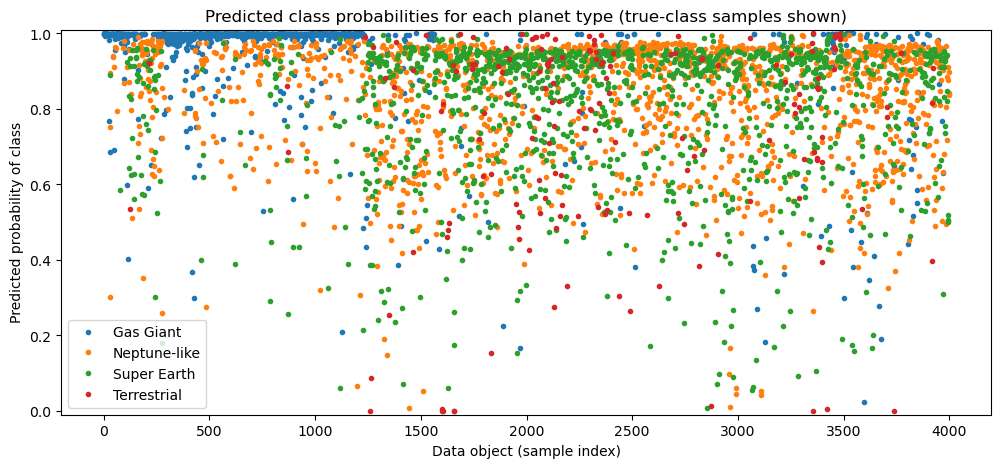

In [81]:
import sklearn.linear_model as lm
X = encoded_df.drop(columns=['planet_type']).values
y = encoded_df["planet_type"].values
# Fit the logistic regression model, and define y_est and y_prob
# Fit the logistic regression model
model = lm.LogisticRegression(max_iter=10000)
model = model.fit(X, y)

y_est = model.predict(X)
y_prob = model.predict_proba(X)  # shape (n_samples, n_classes)

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print("\nOverall misclassification rate: {0:.4f}".format(misclass_rate))

# Get planet type names in the original categorical order
planet_type_cat = df["planet_type"].astype("category")
class_names = list(planet_type_cat.cat.categories)

# Plot predicted probability for each true class (colored by planet type)
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('tab10')
colors = [cmap(i % 10) for i in range(len(class_names))]

for i, cls_name in enumerate(class_names):
    cls_ids = np.nonzero(y == i)[0]
    if cls_ids.size == 0:
        continue
    plt.plot(cls_ids, y_prob[cls_ids, i], '.', color=colors[i], label=cls_name)

plt.xlabel("Data object (sample index)")
plt.ylabel("Predicted probability of class")
plt.legend()
plt.ylim(-0.01, 1.01)
plt.title("Predicted class probabilities for each planet type (true-class samples shown)")
plt.show()

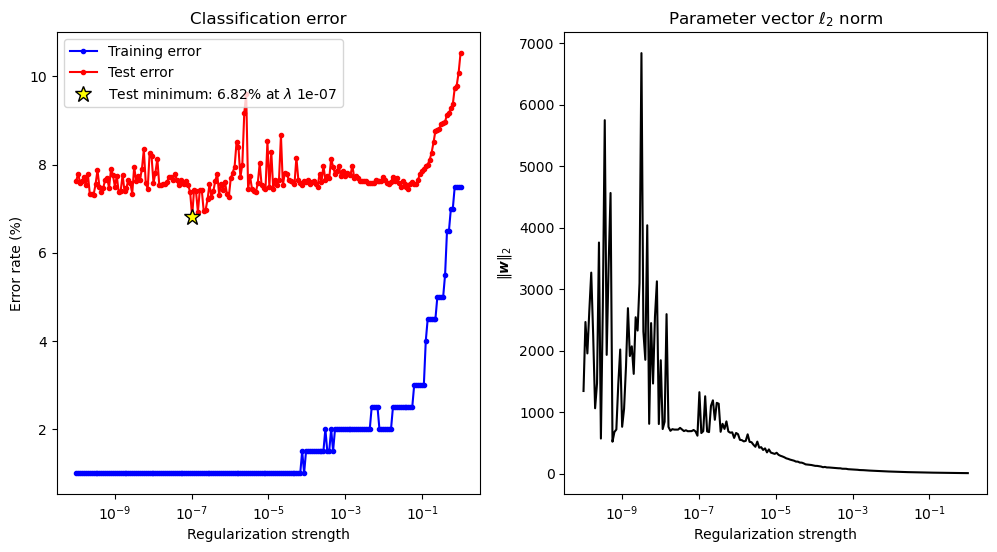

In [82]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Create crossvalidation partition for evaluation using stratification and 95 pct. split between training and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.95, stratify=y)

# Compute the mean and standard deviation of the training data split, then standardize the training and test sets
# Compute the mean and standard deviation of training data split
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
# Standardize the training and test sets
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

# Select the range of regularization strengths to test
lambdas = np.logspace(-10, 0, 200)

# Setup storage for quantities computed in the experiment
train_error_rate = np.zeros(len(lambdas))
test_error_rate = np.zeros(len(lambdas))
coefficient_norm = np.zeros(len(lambdas))

# Loop over all values of the regularization strength
for i, regularization_strength in enumerate(lambdas):

    # Create and fit the regularized logistic regression model on the training set using the current regularization strength
    model = LogisticRegression(penalty="l2", C=1/regularization_strength, max_iter=500)
    model.fit(X_train, y_train)

    # Predict on training and test set
    y_train_est = model.predict(X_train).T
    y_test_est = model.predict(X_test).T

    # Compute and store the training and test error rates
    train_error_rate[i] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate[i] = np.sum(y_test_est != y_test) / len(y_test)

    # Compute and store the L2 norm of the model coefficients
    ### BEGIN SOLUTION
    coefficient_norm[i] = np.linalg.norm(model.coef_, ord=2)
    ### END SOLUTION

# Find the minimum test error and the corresponding regularization strength
min_error = np.min(test_error_rate)
opt_lambda_idx = np.argmin(test_error_rate)
opt_lambda = lambdas[opt_lambda_idx]

# Plot the results
fig, axs = plt.subplots(1,2, figsize=(12, 6))
axs[0].semilogx(lambdas, train_error_rate * 100, 'b.-')
axs[0].semilogx(lambdas, test_error_rate * 100, 'r.-')
axs[0].semilogx(opt_lambda, min_error * 100, "*", color='yellow', markersize=12, markeredgecolor='k')
axs[0].set_xlabel("Regularization strength")
axs[0].set_ylabel("Error rate (%)")
axs[0].set_title("Classification error")
# axs[0].set_ylim([-0.1, 4])
axs[0].legend(["Training error", "Test error", fr"Test minimum: {min_error*100:.2f}% at $\lambda$ {opt_lambda:.2g}"], loc="upper left")

axs[1].semilogx(lambdas, coefficient_norm, "k")
axs[1].set_ylabel("$\\|\\boldsymbol{w}\\|_2$")
axs[1].set_xlabel("Regularization strength")
axs[1].set_title(r"Parameter vector $\ell_2$ norm")
plt.show()

In [ ]:
class_y_true = []
class_y_preds = {
    'baseline': [],
    'logistic_regression': [],
    'KNN': []
}

In [84]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# features / labels (already defined above but repeated here for clarity)
X = encoded_df.drop(columns=['planet_type']).values
y = encoded_df["planet_type"].values

# 10-fold outer CV to evaluate the majority-class baseline
K_out = 10
outer_cv = StratifiedKFold(n_splits=K_out, shuffle=True, random_state=42)

baseline_misclass = np.zeros(K_out)

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # find most frequent planet type in training set
    # y are encoded integer labels so np.bincount works
    most_freq = np.bincount(y_train).argmax()

    # predict that class for all test samples
    y_pred = np.full_like(y_test, fill_value=most_freq)

    # compute misclassification percentage
    misclass_pct = 100.0 * np.mean(y_pred != y_test)
    baseline_misclass[fold_idx] = misclass_pct

    class_y_true.append(y_test)
    class_y_preds['baseline'].append(y_pred)

    print(f"Fold {fold_idx+1}/{K_out}: majority class = {most_freq}, test misclassification = {misclass_pct:.2f}%")

Fold 1/10: majority class = 1, test misclassification = 63.25%
Fold 2/10: majority class = 1, test misclassification = 63.25%
Fold 3/10: majority class = 1, test misclassification = 63.25%
Fold 4/10: majority class = 1, test misclassification = 63.25%
Fold 5/10: majority class = 1, test misclassification = 63.25%
Fold 6/10: majority class = 1, test misclassification = 63.25%
Fold 7/10: majority class = 1, test misclassification = 63.25%
Fold 8/10: majority class = 1, test misclassification = 63.00%
Fold 9/10: majority class = 1, test misclassification = 63.00%
Fold 10/10: majority class = 1, test misclassification = 63.00%


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# features / labels
X = encoded_df.drop(columns=['planet_type', 'discovery_year']).values
y = encoded_df["planet_type"].values

# Nested cross-validation parameters
lambdas = np.logspace(-6, 4, 200)   # inverse-regularization grid for selection (lambda)
K_out = 10
K_in  = 10
outer_cv = StratifiedKFold(n_splits=K_out, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=K_in, shuffle=True, random_state=1)

outer_test_acc = np.zeros(K_out)
outer_test_misclass = np.zeros(K_out)
selected_lambda = np.zeros(K_out)

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # standardize based on outer training fold
    mu = np.mean(X_train, 0)
    sigma = np.std(X_train, 0)
    X_train_std = (X_train - mu) / sigma
    X_test_std = (X_test - mu) / sigma

    # inner CV to pick best lambda
    mean_scores = []
    for lam in lambdas:
        model = LogisticRegression(penalty='l2', C=1/lam, max_iter=1000)
        scores = cross_val_score(model, X_train_std, y_train, cv=inner_cv, scoring='accuracy', n_jobs=-1)
        mean_scores.append(scores.mean())

    best_idx = int(np.argmax(mean_scores))
    optimal_lambda = lambdas[best_idx]
    selected_lambda[fold_idx] = optimal_lambda

    # retrain on full outer training with optimal lambda and evaluate on outer test set
    final_model = LogisticRegression(penalty='l2', C=1/optimal_lambda, max_iter=1000)
    final_model.fit(X_train_std, y_train)
    y_test_pred = final_model.predict(X_test_std)
    outer_test_acc[fold_idx] = accuracy_score(y_test, y_test_pred)
    outer_test_misclass[fold_idx] = 100.0 * np.mean(y_test_pred != y_test)

    class_y_preds['logistic_regression'].append(y_test_pred)

    print(f"Outer fold {fold_idx+1}/{K_out}: optimal lambda={optimal_lambda:.3g}, test acc={outer_test_acc[fold_idx]:.4f}, misclass={outer_test_misclass[fold_idx]:.2f}%")

print(f"\nNested CV test accuracy: mean={outer_test_acc.mean():.4f}, std={outer_test_acc.std():.4f}")
print("Selected lambda per outer fold:",
      np.array2string(selected_lambda,
                      formatter={'float_kind': lambda x: f"{x:.3g}"},
                      separator=", "))

Outer fold 1/10: optimal lambda=1e-06, test acc=0.9675, misclass=3.25%
Outer fold 2/10: optimal lambda=6.44e-05, test acc=0.9775, misclass=2.25%
Outer fold 3/10: optimal lambda=9.01e-06, test acc=0.9600, misclass=4.00%
Outer fold 4/10: optimal lambda=9.12e-05, test acc=0.9550, misclass=4.50%
Outer fold 5/10: optimal lambda=0.000461, test acc=0.9725, misclass=2.75%
Outer fold 6/10: optimal lambda=6.44e-05, test acc=0.9525, misclass=4.75%
Outer fold 7/10: optimal lambda=1.12e-06, test acc=0.9525, misclass=4.75%
Outer fold 8/10: optimal lambda=1.28e-05, test acc=0.9500, misclass=5.00%
Outer fold 9/10: optimal lambda=0.00933, test acc=0.9625, misclass=3.75%
Outer fold 10/10: optimal lambda=0.00185, test acc=0.9575, misclass=4.25%

Nested CV test accuracy: mean=0.9607, std=0.0087
Selected lambda per outer fold: [1e-06, 6.44e-05, 9.01e-06, 9.12e-05, 0.000461, 6.44e-05, 1.12e-06,
 1.28e-05, 0.00933, 0.00185]


In [86]:
print("Selected lambda per outer fold:",
      np.array2string(selected_lambda,
                      formatter={'float_kind': lambda x: f"{x:.3g}"},
                      separator=", "))

Selected lambda per outer fold: [1e-06, 6.44e-05, 9.01e-06, 9.12e-05, 0.000461, 6.44e-05, 1.12e-06,
 1.28e-05, 0.00933, 0.00185]


In [87]:
from sklearn.neighbors import KNeighborsClassifier

# features / labels (already defined above but repeated here for clarity)
X = encoded_df.drop(columns=['planet_type', "discovery_year"]).values
y = encoded_df["planet_type"].values

# Nested (two-level) CV with 10x10 to estimate generalization and select k (KNN) per outer fold
ks = list(range(1,20 , 1))   # odd k values to avoid ties
K_out = 10
K_in  = 10
outer_cv = StratifiedKFold(n_splits=K_out, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=K_in, shuffle=True, random_state=1)

outer_test_acc = np.zeros(K_out)
outer_test_misclass = np.zeros(K_out)
selected_k = np.zeros(K_out, dtype=int)

for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # standardize based on outer training fold
    mu = np.mean(X_train, 0)
    sigma = np.std(X_train, 0)
    # avoid division by zero
    sigma[sigma == 0] = 1.0
    X_train_std = (X_train - mu) / sigma
    X_test_std = (X_test - mu) / sigma

    # inner CV to pick best k
    mean_scores = []
    for k in ks:
        model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        scores = cross_val_score(model, X_train_std, y_train, cv=inner_cv, scoring='accuracy', n_jobs=-1)
        mean_scores.append(scores.mean())

    best_idx = int(np.argmax(mean_scores))
    best_k = ks[best_idx]
    selected_k[fold_idx] = best_k

    # retrain on full outer training with best_k and evaluate on outer test set
    final_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    final_model.fit(X_train_std, y_train)
    y_test_pred = final_model.predict(X_test_std)
    outer_test_acc[fold_idx] = accuracy_score(y_test, y_test_pred)
    outer_test_misclass[fold_idx] = 100.0 * np.mean(y_test_pred != y_test)

    class_y_preds['KNN'].append(y_test_pred)

    print(f"Outer fold {fold_idx+1}/{K_out}: best k={best_k}, test acc={outer_test_acc[fold_idx]:.4f}, misclass={outer_test_misclass[fold_idx]:.2f}%")

print(f"\nNested CV test accuracy: mean={outer_test_acc.mean():.4f}, std={outer_test_acc.std():.4f}")
print("Selected k per outer fold:", selected_k)

Outer fold 1/10: best k=7, test acc=0.9425, misclass=5.75%
Outer fold 2/10: best k=9, test acc=0.9375, misclass=6.25%
Outer fold 3/10: best k=9, test acc=0.9275, misclass=7.25%
Outer fold 4/10: best k=9, test acc=0.9525, misclass=4.75%
Outer fold 5/10: best k=11, test acc=0.9450, misclass=5.50%
Outer fold 6/10: best k=13, test acc=0.9150, misclass=8.50%
Outer fold 7/10: best k=5, test acc=0.9150, misclass=8.50%
Outer fold 8/10: best k=7, test acc=0.9325, misclass=6.75%
Outer fold 9/10: best k=13, test acc=0.9300, misclass=7.00%
Outer fold 10/10: best k=9, test acc=0.9175, misclass=8.25%

Nested CV test accuracy: mean=0.9315, std=0.0124
Selected k per outer fold: [ 7  9  9  9 11 13  5  7 13  9]


In [88]:
print(df["planet_type"].value_counts())
print(df["planet_type"].value_counts().idxmax())
print(encoded_df["planet_type"].value_counts())
print(encoded_df["planet_type"].value_counts().idxmax())

planet_type
Neptune-like    1473
Super Earth     1304
Gas Giant       1053
Terrestrial      170
Name: count, dtype: int64
Neptune-like
planet_type
1    1473
2    1304
0    1053
3     170
Name: count, dtype: int64
1


In [89]:
def mcnemar(y_true, yhatA, yhatB, alpha=0.05):
    """
    Perform McNemar's test to compare the accuracy of two classifiers.

    Parameters:
    - y_true: array-like, true labels
    - yhatA: array-like, predicted labels by classifier A
    - yhatB: array-like, predicted labels by classifier B
    - alpha: float, significance level (default: 0.05)

    Returns:
    - E_theta: float, estimated difference in accuracy between classifiers A and B (theta_hat)
    - CI: tuple, confidence interval of the estimated difference in accuracy
    - p: float, p-value for the two-sided test of whether classifiers A and B have the same accuracy
    """

    # Set up the contingency table
    nn = np.zeros((2, 2))

    # 2.1) Fill in the contingency table
    ### BEGIN SOLUTION
    # Correctness indicators
    cA = yhatA == y_true
    cB = yhatB == y_true

    # Fill the contingency table
    nn[0, 0] = sum([cA[i] * cB[i] for i in range(len(cA))]) 
    # Or a bit smarter: nn[0, 0] = sum(cA & cB)
    nn[0, 1] = sum(cA & ~cB)
    nn[1, 0] = sum(~cA & cB)
    nn[1, 1] = sum(~cA & ~cB)
    ### END SOLUTION

    # get values from the contingency table
    n = len(y_true)
    n12 = nn[0, 1]
    n21 = nn[1, 0]

    # 2.2) Calculate E_theta and Q from the values in the contingency table
    ### BEGIN SOLUTION
    E_theta = (n12 - n21) / n

    Q = (
        n**2
        * (n + 1)
        * (E_theta + 1)
        * (1 - E_theta)
        / ((n * (n12 + n21) - (n12 - n21) ** 2))
    )
    ### END SOLUTION


    # 2.3) Calculate f and g for the beta distribution
    ### BEGIN SOLUTION
    f = (E_theta + 1)/2 * (Q - 1)
    g = (1 - E_theta)/2 * (Q - 1)
    ### END SOLUTION

    # Calculate confidence interval
    CI = tuple(bound * 2 - 1 for bound in st.beta.interval(1 - alpha, a=f, b=g))

    # Calculate p-value for the two-sided test using exact binomial test
    p = 2 * st.binom.cdf(min([n12, n21]), n=n12 + n21, p=0.5)

    print(f"Result of McNemars test using alpha = {alpha}\n")
    print("Contingency table")
    print(nn, "\n")
    if n12 + n21 <= 10:
        print("Warning, n12+n21 is low: n12+n21=", (n12 + n21))

    print(f"Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = {CI[0]:.4f}, {CI[1]:.4f}\n")
    print(
        f"p-value for two-sided test A and B have same accuracy (exact binomial test): p={p}\n"
    )

    return E_theta, CI, p

In [90]:
class_y_true = np.concatenate(class_y_true)

In [91]:
class_y_preds_concat = {model: np.concatenate(model_preds) for model, model_preds in class_y_preds.items()}

In [92]:
l2_loss = lambda y, y_pred: (y - y_pred)**2
alpha = 0.05

setup1_class_storage = {
    'logistic_regression_KNN': [],
    'KNN_baseline': [],
    'logistic_regression_baseline': []
}

[theta_hat, CI, p] = mcnemar(class_y_true, class_y_preds_concat["logistic_regression"], class_y_preds_concat["KNN"], alpha=alpha)
setup1_class_storage['logistic_regression_KNN'].append((theta_hat, CI, p))
print(f"Difference in loss between Logistic Regression and KNN: \ntheta_hat: {theta_hat:.4f}, \nCI: [{CI[0]:.4f}, {CI[1]:.4f}], \np-value: {p}")

[theta_hat, CI, p] = mcnemar(class_y_true, class_y_preds_concat["KNN"], class_y_preds_concat["baseline"], alpha=alpha)
setup1_class_storage['KNN_baseline'].append((theta_hat, CI, p))
print(f"Difference in loss between KNN and Baseline: \ntheta_hat: {theta_hat:.4f}, \nCI: [{CI[0]:.4f}, {CI[1]:.4f}], \np-value: {p}")

[theta_hat, CI, p] = mcnemar(class_y_true, class_y_preds_concat["logistic_regression"], class_y_preds_concat["baseline"], alpha=alpha)
setup1_class_storage['logistic_regression_baseline'].append((theta_hat, CI, p))
print(f"Difference in loss between Logistic Regression and Baseline: \ntheta_hat: {theta_hat:.4f}, \nCI: [{CI[0]:.4f}, {CI[1]:.4f}], \np-value: {p}")

Result of McNemars test using alpha = 0.05

Contingency table
[[3672.  171.]
 [  54.  103.]] 

Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = 0.0220, 0.0365

p-value for two-sided test A and B have same accuracy (exact binomial test): p=2.36517561384733e-15

Difference in loss between Logistic Regression and KNN: 
theta_hat: 0.0293, 
CI: [0.0220, 0.0365], 
p-value: 2.36517561384733e-15
Result of McNemars test using alpha = 0.05

Contingency table
[[1407. 2319.]
 [  66.  208.]] 

Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = 0.5468, 0.5795

p-value for two-sided test A and B have same accuracy (exact binomial test): p=0.0

Difference in loss between KNN and Baseline: 
theta_hat: 0.5633, 
CI: [0.5468, 0.5795], 
p-value: 0.0
Result of McNemars test using alpha = 0.05

Contingency table
[[1422. 2421.]
 [  51.  106.]] 

Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = 0.5764, 0.6084

p-value for two-sided test A and B have same a

In [93]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Use the optimal lambda from the last outer cv fold as the final lambda
optimal_lambda = selected_lambda[-1]
print(f"Using optimal lambda (from last outer CV fold): {optimal_lambda:.4f}")

# Prepare full dataset
X_full = encoded_df.drop(columns=['planet_type', 'discovery_year']).values
y_full = encoded_df["planet_type"].values

# Standardize features
mu_full = np.mean(X_full, axis=0)
sigma_full = np.std(X_full, axis=0)
X_full_std = (X_full - mu_full) / sigma_full

# Train final logistic regression model on full dataset
final_logistic_model = LogisticRegression(
    penalty='l2',
    C=1/optimal_lambda,
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs'
)
final_logistic_model.fit(X_full_std, y_full)


Using optimal lambda (from last outer CV fold): 0.0018


/opt/anaconda3/envs/ml_project/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(541.5871378079471)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [94]:

# Get feature names
feature_names = encoded_df.drop(columns=['planet_type', 'discovery_year']).columns.tolist()

# Get class names
planet_type_cat = df["planet_type"].astype("category")
class_names = list(planet_type_cat.cat.categories)
print(f"Number of classes: {len(class_names)}")
print(f"Classes: {class_names}")

# Get coefficients for each class
coefficients = final_logistic_model.coef_ 
intercepts = final_logistic_model.intercept_

print(f"\nCoefficient matrix shape: {coefficients.shape}")
print(f"Features: {feature_names}")

# Analyze feature importance across all classes
# Use mean absolute coefficient as overall importance measure
feature_importance = np.mean(np.abs(coefficients), axis=0)
print(coefficients)


Number of classes: 4
Classes: ['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial']

Coefficient matrix shape: (4, 8)
Features: ['distance', 'stellar_magnitude', 'orbital_radius', 'orbital_period', 'eccentricity', 'detection_method', 'mass', 'radius']
[[ 1.80014543e-01  3.83015154e-01  4.69024548e-01 -1.67389560e-01
   2.14441793e-01 -9.34040870e-01  4.62488035e+00  1.60545425e+01]
 [-1.90722107e-01  7.19265893e-01  8.47552999e-01 -8.41067921e-01
   6.46673089e-02 -1.28081427e+00 -1.52027637e+00  1.24123124e+01]
 [ 1.79809509e-02 -3.60504977e-01 -1.56680686e+00  1.45789729e+00
  -2.03407587e-02  9.45687147e-02  9.35340062e-01 -9.05541439e+00]
 [-7.27338746e-03 -7.41776070e-01  2.50229311e-01 -4.49439813e-01
  -2.58768343e-01  2.12028642e+00 -4.03994403e+00 -1.94114405e+01]]


          Feature  Coefficient
           radius    14.233427
             mass     2.780110
 detection_method     1.107428
   orbital_radius     0.783403
   orbital_period     0.728949
stellar_magnitude     0.551141
     eccentricity     0.139555
         distance     0.098998


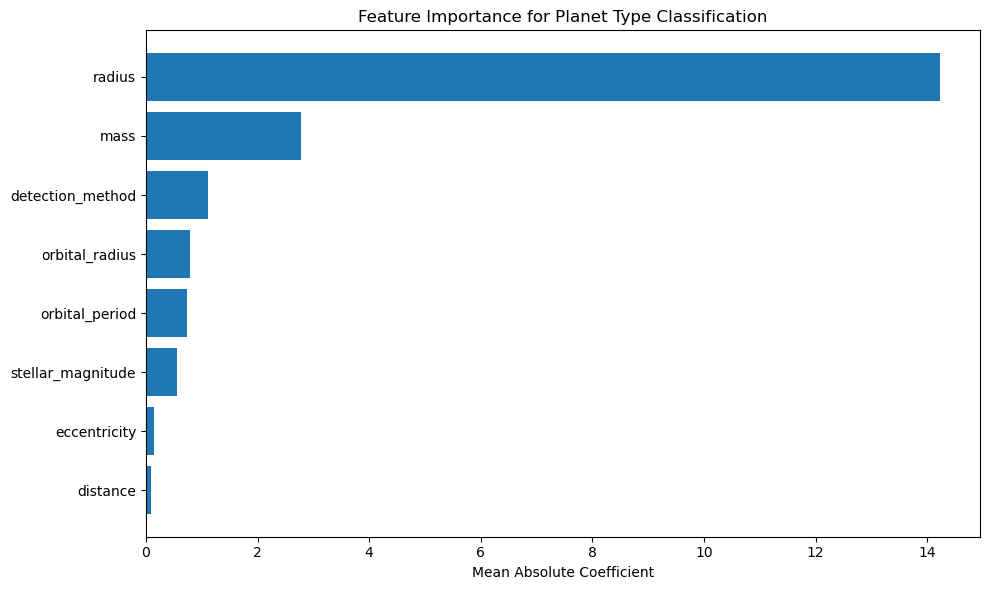

In [95]:
# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': feature_importance
}).sort_values('Coefficient', ascending=False)

print(importance_df.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Mean Absolute Coefficient')
plt.title('Feature Importance for Planet Type Classification')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Class 0: Gas Giant
          Feature  Coefficient
           radius    16.054542
             mass     4.624880
 detection_method    -0.934041
   orbital_radius     0.469025
stellar_magnitude     0.383015
     eccentricity     0.214442
         distance     0.180015
   orbital_period    -0.167390

Class 1: Neptune-like
          Feature  Coefficient
           radius    12.412312
             mass    -1.520276
 detection_method    -1.280814
   orbital_radius     0.847553
   orbital_period    -0.841068
stellar_magnitude     0.719266
         distance    -0.190722
     eccentricity     0.064667

Class 2: Super Earth
          Feature  Coefficient
           radius    -9.055414
   orbital_radius    -1.566807
   orbital_period     1.457897
             mass     0.935340
stellar_magnitude    -0.360505
 detection_method     0.094569
     eccentricity    -0.020341
         distance     0.017981

Class 3: Terrestrial
          Feature  Coefficient
           radius   -19.411440
             m

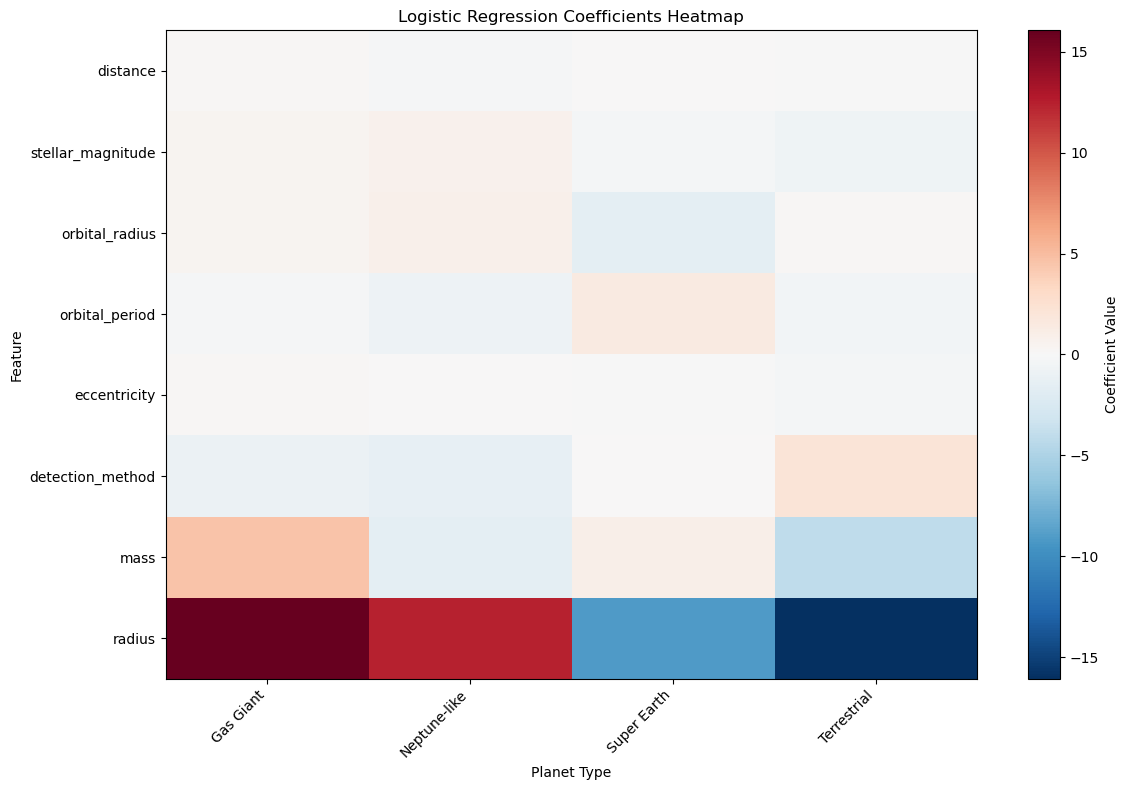

In [96]:
# Show coefficients for each class
for class_idx, class_name in enumerate(class_names):
    print(f"\nClass {class_idx}: {class_name}")
    class_coefs = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[class_idx, :]
    }).sort_values('Coefficient', key=abs, ascending=False)
    print(class_coefs.to_string(index=False))

# Visualize coefficients heatmap
plt.figure(figsize=(12, 8))
plt.imshow(coefficients.T, aspect='auto', cmap='RdBu_r', vmin=-coefficients.max(), vmax=coefficients.max())
plt.colorbar(label='Coefficient Value')
plt.yticks(range(len(feature_names)), feature_names)
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.xlabel('Planet Type')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients Heatmap')
plt.tight_layout()
plt.show()
